# Convolución

## Índice 

## Objetivos del notebook 

## Convolución continua

La convolución entre dos funciones es un concepto físico importante en muchas ramas de la ciencia. Para el caso de sistemas lineales e invariantes en el tiempo (LTI), la integral de convolución permite determinar la respuesta del sistema ante cualquier entrada, a partir del conocimiento de la respuesta del sistema ante una única entrada particular: **el impulso** $\delta(t)$. Si la **respuesta impulsiva** se denota como $h(t)$, la salida de un sistema LTI excitado con una entrada cualquiera $x(t)$ está dada por la expresión:

$$y(t)=x(t)*h(t)=\int_{-\infty}^{\infty}{x(\tau)h(t-\tau) d\tau}$$

Esta integral se conoce como **integral de convolución o integral de superposicion** y es la representación de una sistema continuo en el tiempo, lineal e invariante en función de su respuesta impulsiva $h(t)$.

Aprovechemos para recordar los pasos del procedimiento para realizar la convolución continua (Analíticamente):

1. **Graficar**: ambas señales integrando en la variable de integración.
2. **Determinar**: encontrar los valores de t (casos) donde se produce una superposición (parcial o total) en el integrando.
3. **Establecer**: los límites de integración a partir de la alineación de las señales.
4. **Integrar**: y desplazar.

Los pasos del procedimiento para realizar la convolución continua (gráficamente):
1. **Reflexión**: se refleja h(t) respecto del eje de ordenadas.
2. **Desplazamiento**: se desplaza h(-) una cantidad t donde se desea evaluar la convolución.
3. **Mutiplicación**: Se multiplica la funcion desplazada h(t-) y x(t).
4. **Integración**: el área bajo el producto h(t-) y x(t) es el valor de la convolución en el tiempo t.

Veamos un ejemplo con señal y respuesta al impulso **finitas** (adaptado de Signals and Systems for Dummies pp.107)

$$2x(t-3.5) \rightarrow x(t)=\begin{cases} 1/\tau, \text{para } \vert t \vert< \tau/2  \\  0, \text{resto  } 
\end{cases}$$

$$h[(t-1)/2] \rightarrow h(t)=\begin{cases} 1/\tau, \text{para } \vert t \vert< \tau/2  \\  0, \text{resto  } 
\end{cases}$$

### **Graficar**
![](../img/conv.png)

In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rect(t,tau):
    x = np.zeros(len(t))
    for k,tk in enumerate(t): # agrega un contador a un iterable y lo devuelve en forma de objeto enumerado
        if np.abs(tk) > tau/2.:
            x[k] = 0
        else:
            x[k] = 1
    return x

t = np.arange(-5,5,.01)
x = rect(t-3.5,1)

plt.plot(t,2*x,'r')
plt.ylabel('$x(t)$')
plt.xlabel('$t$')

In [ ]:
h = rect((t-1)/2,1)
plt.plot(t,h)
plt.ylabel('$h(t)$')
plt.xlabel('$t$')

### **Determinar**

Hay 5 casos a considerar:

* El caso 1 y 5 ocurre cuando **no hay solapamiento**. Para $t<3$ y para $t-2>4$ o de igual manera $t>6$.
 * Para el caso 1: $y(t)=0$ para $t<3$.
 * Para el caso 5: $y(t)=0$ para $t-2>4$.
* El caso 2 ocurre cuando hay un **solapamiento parcial**. Para $t\geq 3$ y $t<4$ o de igual manera para $3\leq t<4$.
* El caso 3 ocurre cuando hay un **solapamiento total**. Para $t-2<3$ y $t\geq 4$ o de igual manera para $4\leq t<5$.
* El caso 4 ocurre cuando hay un **solapamiento parcial**. Para $t-2>3$ y $t-2<4$ o de igual manera para $5\leq t\leq 6$.

### **Establecer**

* Caso 2: los limites respecto a $\tau$ son: 3 a t.
* Caso 3: los limites respecto a $\tau$ son: 3 a 4.
* Caso 4: los limites respecto a $\tau$ son: t-2 a 4.

### **Integrar**

* Caso 2: $y(t)=\int_{3}^{t}{2x1d\tau}=[2\tau]_{3}^{t}=2(t-3)$, para $3\leq t<4$.

In [ ]:
import sympy as sym

tau = sym.symbols('tau')

In [ ]:
y =  sym.integrate(2,(tau,3, 't'))
y

* Caso 3: $y(t)=\int_{3}^{4}{2x1d\tau}=[2\tau]_{3}^{4}=2$, para $4\leq t<5$.

In [ ]:
y =  sym.integrate(2,(tau,3, 4))
y

* Caso 4: $y(t)=\int_{t-2}^{4}{2x1d\tau}=[2\tau]_{t-2}^{4}=2(6-t)$, para $5\leq t\leq 6$.

In [ ]:
y =  sym.integrate(2,(tau,'t-2', 4))
y

Si componemos los resultados parciales obtenemos:

$$y(t)=\begin{cases} 
2(t-3), \text{ para } 3\leq t<4 \\  
2, \text{  para } 4\leq t<5 \\
2(6-t), \text{ para } 5\leq t\leq 6 \\ 
0, \text{ para otros casos }\\  
\end{cases}$$

In [ ]:
t = np.arange(0,8,0.05)

def ejemplo(t):
    y = np.zeros(len(t))
    for k, tt in enumerate(t):
        if tt >= 3 and tt < 4:
            y[k] = 2*(tt - 3)
        elif tt >= 4 and tt < 5:
            y[k] = 2
        elif tt >= 5 and tt < 6:
            y[k] = 2*(6 - tt)
    return y

y = ejemplo(t)
plt.plot(t,y)

> Pensar en una función que realice la integral de convolución, teniendo como argumentos de entrada el eje temporal, la señal x(t) y la respuesta al impulso h(t). Los argumentos de salida deben ser y y ty.

## Convolución discreta

Un sistema representado en entrada/salida por lo general se expresa en términos de su respuesta al pulso unitario, la cual se define como $h[n]$. Esta respuesta es el resultado de aplicar un pulso unitario \delta [n] Por las propiedades de causalidad la respuesta al pulso unitario h[n] debe ser cero para todos los enteros n < 0.

$$y[n] = \sum_{i=0}^{n}{h[i]x[n-i]} , n\ge 0,$$

se lo conoce como la convolución de $h[n]$ y $x[n]$, y se denota con el simbolo $*$, por lo tanto:

$$y[n] = h[n]*x[n]=\sum_{i=0}^{n}{h[i]x[n-i]}$$

Una consecuencia interesante de la representación de convolución es que el sistema está determinado completamente por la respuesta al pulso unitario $h[n]$. En particular, si conocemos $h[n]$, la respuesta de salida resultante de cualquier entrada $x[n]$ puede calcularse, evaluando la ultima ecuación.

Veamos un ejemplo de la convolución de un pulso unitario consigo mismo [Kamen, Edward W., 2008]:

$$x[n]=h[n]=\begin{cases} 1/\tau, \text{para } \vert n \vert< \tau/2  \\  0, \text{resto  } 
\end{cases}$$

/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Muestras $n$')

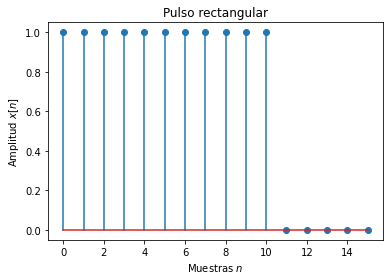

In [94]:
x = np.concatenate((np.ones(11),np.zeros(5)))
n = np.arange(0, 16)
np.convolve
plt.stem(n,x)
plt.title('Pulso rectangular')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('Muestras $n$')

/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'Muestras $n$')

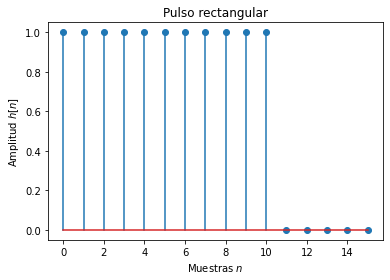

In [95]:
h = np.copy(x)
plt.stem(n,h)
plt.title('Pulso rectangular')
plt.ylabel('Amplitud $h[n]$')
plt.xlabel('Muestras $n$')

In [96]:
import time
from scipy import signal

/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Tiempo transcurrido: 0.0005857944488525391 s


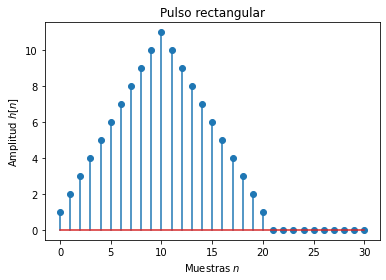

In [103]:
t = time.time()
y = np.convolve(x,h)
dt = time.time() - t

n = np.arange(0,len(x)+len(h)-1,1)
plt.stem(n,y)
plt.title('Pulso rectangular')
plt.ylabel('Amplitud $h[n]$')
plt.xlabel('Muestras $n$')

print('Tiempo transcurrido:', dt, 's')

In [104]:
t1 = time.time()
signal.fftconvolve(x,h)
dt1 = time.time() - t1

print('Tiempo transcurrido:', dt1, 's')

Tiempo transcurrido: 0.0017414093017578125 s


> nota: Esto es generalmente mucho más rápido que convolve para matrices grandes (n> ~ 500), pero puede ser más lento cuando solo se necesitan unos pocos valores de salida, y solo puede generar matrices flotantes (las entradas de matriz de objetos o int se convertirán en flotantes). A partir de la versión 0.19, convolve elige automáticamente este método o el método directo basándose en una estimación de cuál es más rápido.

## Referencias

 * Wickert, Mark. Signals and Systems for Dummies. John Wiley & Sons, 2013.
 * Kamen, Edward W., and Bonnie S. Heck. Fundamentos de señales y sistemas usando la Web y Matlab. Pearson Prentice-Hall, 2008.

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

Material adaptado del curso [Introducción a Python](https://github.com/infiniemlabs-acustica/python_introduccion)

© 2020. Infiniem Labs Acústica. infiniemlab.dsp@gmail.com (CC BY-SA 4.0))